# Jobsheet 05 - Decision tree

## Tujuan
1. Mahasiswa mampu menjelaskan konsep Decision Tree
2. Mahasiswa mampu menerapkan konsep Decision tree untuk klasifikasi
3. Mahasiswa mampu menerapkan konsep Decision tree untuk regresi

# Materi

## Pengertian Decision Tree

Decision tree merupakan salah satu model machine learning yang termasuk kedalam supervised learning. decision tree berbentuk seperti graph yang memodelkan keputusan. Digunakan untuk merepresentasikan keputusan dan pengambilan keputusan secara visual dan eksplisit.  Decision tree disebut juga dengan istilah CART (Classification and Regression Trees) yang diperkenalkan oleh Leo Breiman untuk merujuk pada algoritma Decision Tree yang dapat digunakan untuk masalah klasifikasi atau regresi. Algoritma CART menyediakan dasar untuk algoritma penting seperti **bagged decision trees, random forest and boosted decision trees**.

Istilah penting dalam Decision tree

![features example](assets/pic1.png)

Model decision tree adalah binary tree dimana tree tersebut terdiri dari bebrapa komponen yaitu :

* Setiap **Node** mewakili Fitur (Atribut/ variable x) pada gambar 7.1 node disimbolkan dengan persegi Panjang
* Setiap **Branch** atau **Link** atau **Edge** mewakili Keputusan atau Aturan yang disimbolkan dengan panah
* Setiap **leaf** mewakili Hasil keputusan yang merupakan output variable digunakan sabagai hasil prediksi, disimbolkan dengan bentuk elips.

Selain komponen diatas terdapat beberapa istilah yang ada dalam decision tree

* **Splitting / Pemisahan**: Ini adalah proses membagi node menjadi dua atau lebih sub-node.
* **Decision Node**: Ketika sub-node terpecah menjadi sub-node lebih lanjut, maka itu disebut node keputusan.
* **Pruning / Pemangkasan**: Saat dilakukan penghapusan sub-node dari node keputusan, proses ini disebut pemangkasan. 
* **Branch / Sub-Tree**: Sebuah sub-bagian dari seluruh pohon disebut cabang atau sub-pohon.
* **Parent and Child Node (Node Induk dan Anak)**: Node, yang dibagi menjadi beberapa sub-node disebut node induk dari sub-node sedangkan sub-node adalah anak dari node induk

Pada permasalahan klasifikasi leaf node dari decision tree mewakili kelas sedangkan pada permasalahan regresi nilai variabel respons untuk instance yang terdapat dalam leaf node dapat dirata-ratakan untuk menghasilkan estimasi untuk variabel respons. Cara untuk melakukan prediksi pada decision tree untuk data pengujian hanya perlu mengikuti edge sampai mencapai leaf node.


## Tahapan Algoritma Decision Tree

Pada Decision tree pembuatan tree merupakan Langkah awal yang harus dilaksanan. Dalam pembuatan tree diperlukan perhitungan menggunakan Information Gain ataupun Gini Index untuk menentukan Root node/ node selanjutnya. Berikut merupakah tahapan pembuatan tree secara top-down:


1. Pada iterasi pertama dilakukan pemilihan Root Node didasarkan pada Gini Indeks terendah atau Information Gain tertinggi dari keseluruhan fitur (variable x) pada data training.
2. Kemudian memisahkan himpunan S untuk menghasilkan subset data
3. Selanjut proses akan diulang untuk mencari decision node yang akan menjadi cabang selanjutnya. Penentuan decision node juga menggunakan Gini Indeks terendah atau Information Gain tertinggi. Akan tetapi yang membedakan adalah fitur yang digunakan adalah fitur yang tidak pernah menggunakan sebelum nya (subset data)
4. Algoritma terus menerus berulang pada setiap subset data hingga menemukan leaf yang merupakan label kelas


## Decision Tree untuk Klasifikasi
- Classification-tree
- Urutan pertanyaan if-else tentang fitur individual.
     - **Tujuan**: menyimpulkan label kelas
     - Mampu menangkap hubungan non-linear antara fitur dan label
     - Tidak memerlukan penskalaan fitur (mis. Standardisasi)
- Decision Regions
    - Decision region: area di bagian fitur di mana semua instance ditugaskan ke satu label kelas
    - Decision Boundary: permukaan yang memisahkan area keputusan yang berbeda
![decision region](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/decision_boundary.png?raw=1)

## Kegiatan Praktikum

### Classification Tree
Dalam latihan ini Anda akan melakukan training dengan data [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) dari UCI machine learning repository. latihan ini akan melakukan prediksi memprediksi apakah tumor ganas atau jinak berdasarkan dua fitur: radius rata-rata tumor (```radius_mean```) dan jumlah titik cekung rata-rata tumor (```concave points_mean```).

#### Persiapan

In [3]:
# Import library yang dibutuhakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Preprocess

In [3]:
# Load dataset
wbc = pd.read_csv('./dataset/wbc.csv')

# Inspeksi data
display(wbc.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Cek Deskripsi Data
display(wbc.describe())

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Cek Informasi Data
print(wbc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
X = wbc[['radius_mean', 'concave points_mean']] # Ambil hanya fitur yang direncanakan
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

#### Split Data Training dan Testing

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier 'dt' dengan kedalaman maksimum 6
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

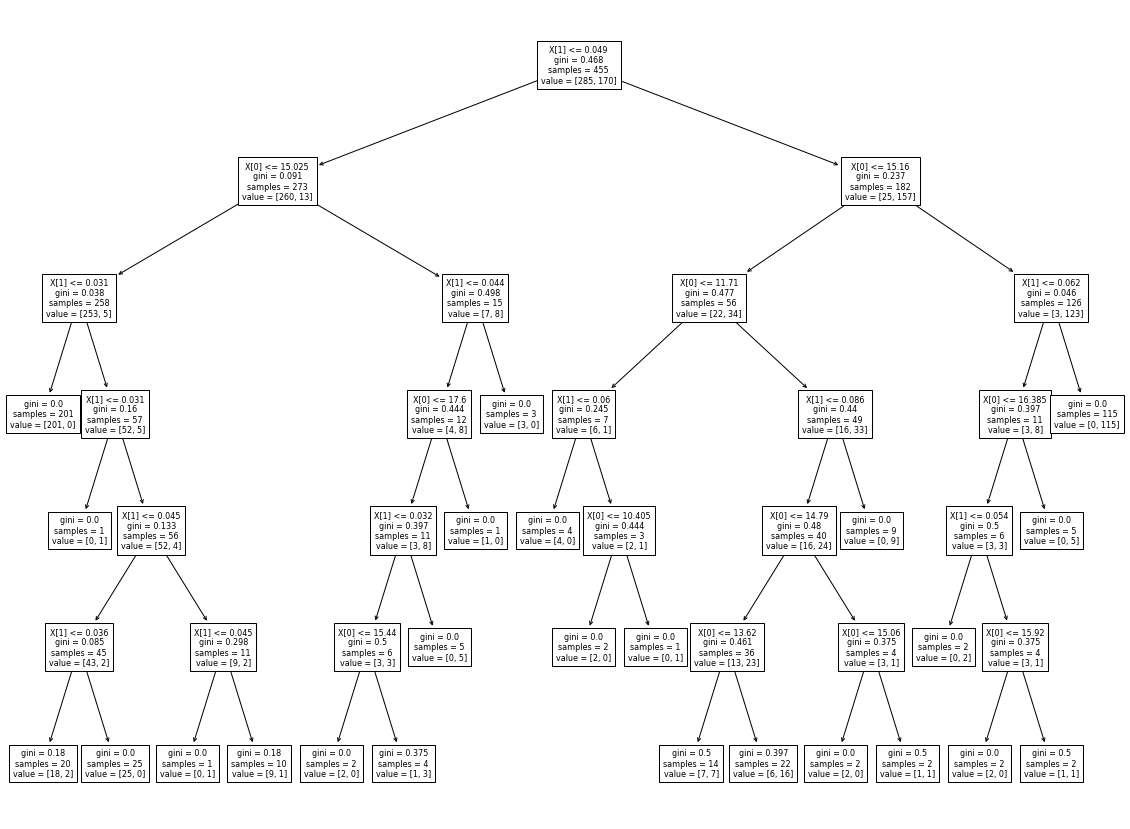

In [9]:
# Visualisasi hasil DT
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(dt.fit(X_train, y_train), fontsize=8)
plt.show()

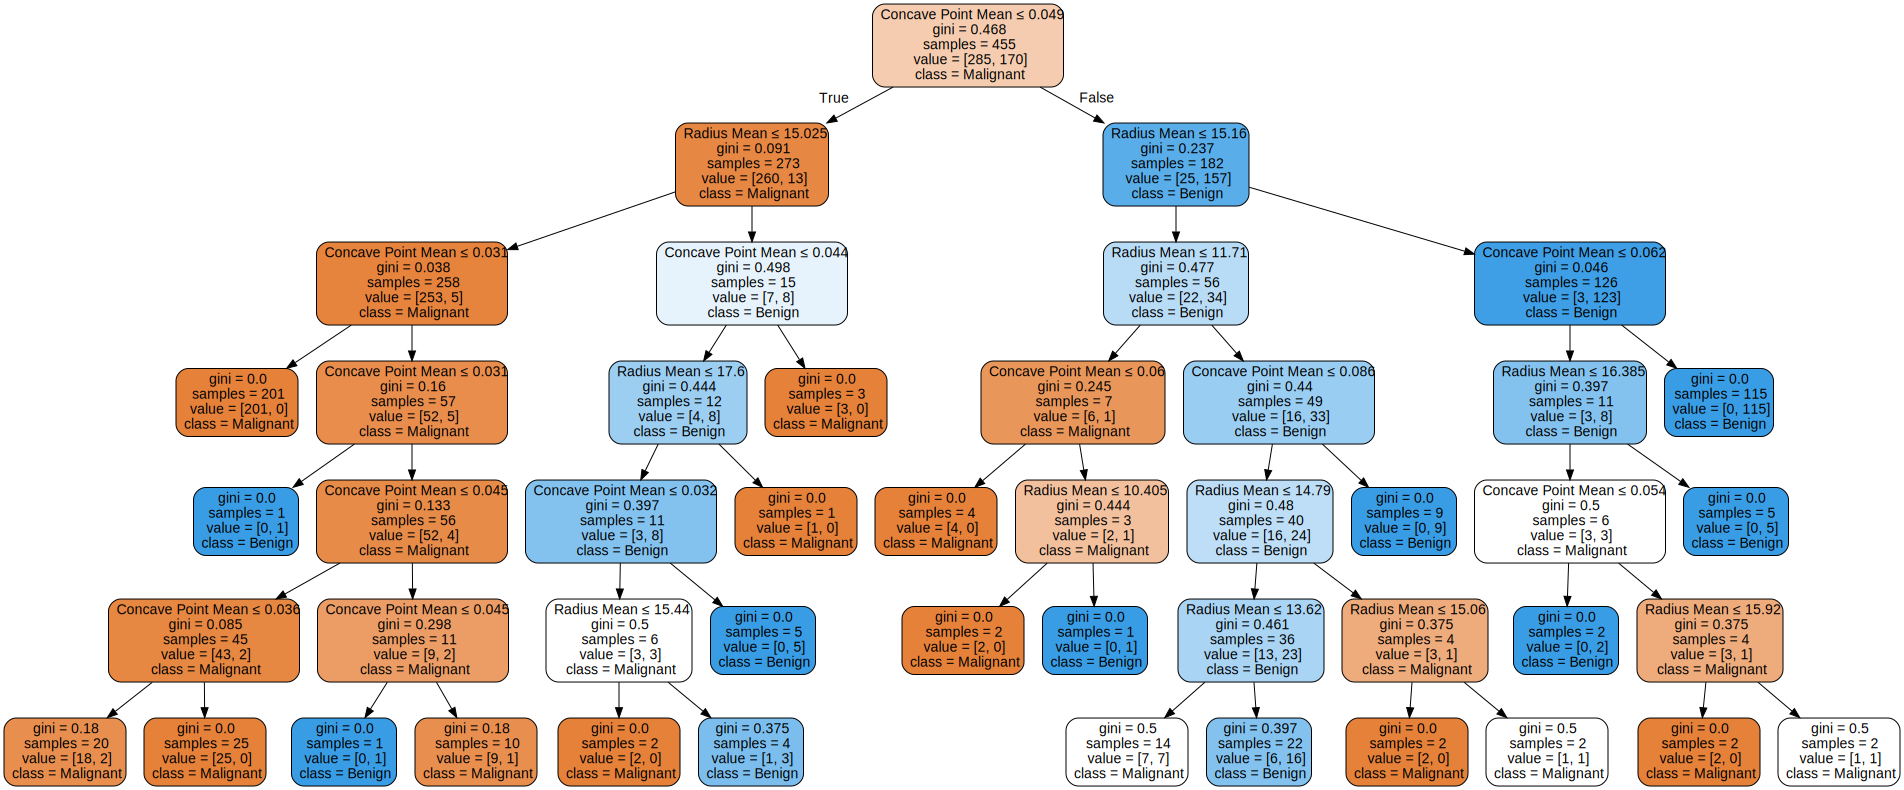

In [10]:
# Visualisasi dengan Graphviz
import graphviz

dot_data = tree.export_graphviz(
    dt.fit(X_train, y_train), 
    out_file=None,
    feature_names=['Radius Mean', 'Concave Point Mean'],
    class_names=['Malignant', 'Benign'],
    filled=True, rounded=True, 
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [11]:
# Memprediksi label set test
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


In [12]:
# Kembalikan hasil prediksi ke label asli
def inverse_label(e):
    return 'M' if e == 1 else 'B'

res_label = np.vectorize(inverse_label)
pred_label = res_label(y_pred[0:5])
print(pred_label)

# Anda juga dapat menggunakan cara lain untuk melakukan hal ini
# Pada LabelEncoder() terdapat fungsi untuk melakukan inverse label.

['M' 'B' 'B' 'M' 'B']


#### Evaluasi Classification Tree

Sekarang Anda telah menyesuaikan classification tree selanjutnya adalah mengevaluasi kinerjanya pada set pengujian. Anda akan melakukannya menggunakan metrik akurasi yang sesuai dengan fraksi prediksi yang benar yang dibuat pada set pengujian.

In [13]:
from sklearn.metrics import accuracy_score

# Memprediksi test set labels
y_pred = dt.predict(X_test)

#  menghitung set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


#### Menggunakan Entropi sebagai Kriteria
Dalam latihan ini, Anda akan melatih classification tree pada Wisconsin Breast Cancer dataset menggunakan entropi sebagai kriteria informasi. Anda akan melakukannya menggunakan keseluruhan dari 30 fitur dalam dataset, yang dibagi menjadi 80% untuk train dan 20% untuk test.



In [14]:
# Seleksi fitur

# Slice dataframe mulai dari kolom 'radius_mean' sampai 'fractal_dimension_worst'
X_full = wbc.iloc[:,2:-1]
y_full = wbc['diagnosis']

# Cek jumlah fitur dan instance
X_full.shape

(569, 30)

In [15]:
# Split data untuk training dan testing
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' sebagai kriteria informasi
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy kedalam training set
dt_entropy.fit(X_full_train, y_full_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

### Entropy vs Gini index
dalam latihan ini Anda akan membandingkan akurasi set tes dt_entropy dengan akurasi tree lain yang bernama ```dt_gini```. sebuah tree ```dt_gini```dilatih pada dataset yang sama menggunakan parameter yang sama kecuali untuk kriteria informasi yang ditetapkan ke indeks gini menggunakan kata kunci ```'gini'```.

In [17]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_full_train, y_full_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [18]:
from sklearn.metrics import accuracy_score

# menggunakan dt_entropy untuk memprediksi test set labels
y_full_pred_entropy = dt_entropy.predict(X_full_test)
y_full_pred_gini = dt_gini.predict(X_full_test)

# mengevaluasi accuracy_entropy
accuracy_entropy = accuracy_score(y_full_test, y_full_pred_entropy)
accuracy_gini = accuracy_score(y_full_test, y_full_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.956140350877193
Accuracy achieved by using gini:  0.9385964912280702


## Decision Tree untuk Regresi
- Kriteria Informasi untuk Regression Tree
$$ I(\text{node}) = \underbrace{\text{MSE}(\text{node})}_{\text{mean-squared-error}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}} \big(y^{(i)} - \hat{y}_{\text{node}}  \big)^2 $$
$$ \underbrace{\hat{y}_{\text{node}}}_{\text{mean-target-value}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}}y^{(i)}$$
- Prediction
$$ \hat{y}_{\text{pred}}(\text{leaf}) = \dfrac{1}{N_{\text{leaf}}} \sum_{i \in \text{leaf}} y^{(i)}$$

### Train menggunakan regression tree
Dalam latihan ini, Anda akan melatih regression tree untuk memprediksi konsumsi bahan bakar dalam satuan *mpg* (miles per gallon) pada mobil menggunakan dataset berikut [auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset) dengan menggunakan keenam fitur yang tersedia.



#### Preprocess

In [20]:
mpg = pd.read_csv('./dataset/auto-mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [21]:
mpg = pd.get_dummies(mpg)

In [22]:
mpg.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt kedalam the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

### Evaluasi Regression Tree
Dalam latihan ini, Anda akan mengevaluasi kinerja set tes dari ```dt``` menggunakan metode *Root Mean Squared Error* (RMSE) metric. RMSE model mengukur rata-rata, seberapa besar prediksi model yang dihasilkan berbeda dari label yang sebenarnya. RMSE model dapat diperoleh dengan menghitung akar kuadrat dari model Mean Squared Error (MSE).



In [26]:
from sklearn.metrics import mean_squared_error

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE dt: {:.2f}".format(rmse_dt))

Test set RMSE dt: 3.68


### Linear Regression vs Regression Tree

Dalam latihan ini, Anda akan membandingkan set tes RMSE dari ```dt``` berdasarkan pada apa yang didapat dari model regresi linier. pada jobsheet juga dibuat instance dari mode linear regression ```lr``` dan melatihnya menggunakan dataset yang sama dengan ```dt```.



#### Preprocess

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))

Linear Regression test set RMSE: 4.07
Regression Tree test set RMSE: 3.68


## Tugas 

Lakukanlah proses classification learning Decision Tree dengan ketentuan,

1. Menggunakan data `mushrooms.csv`
2. Evaluasi hasilnya

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
mushroom = pd.read_csv('./dataset/mushrooms.csv')
display(mushroom.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [26]:
print(mushroom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [40]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder

labelEn = LabelEncoder()
for col in mushroom.columns:
    mushroom[col] = labelEn.fit_transform(mushroom[col])

display(mushroom.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [42]:
display(mushroom.describe())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [43]:
x = mushroom.iloc[:,1:23].values
y = mushroom.iloc[:,0].values
y = y.reshape(len(y),1)

In [44]:
from sklearn.model_selection import train_test_split

x_trains, x_tests, y_trains, y_tests = train_test_split(x, y, train_size=0.2, random_state=1)

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtg = DecisionTreeClassifier(max_depth=6, random_state=1)
dtg.fit(x_trains, y_trains)

DecisionTreeClassifier(max_depth=6, random_state=1)

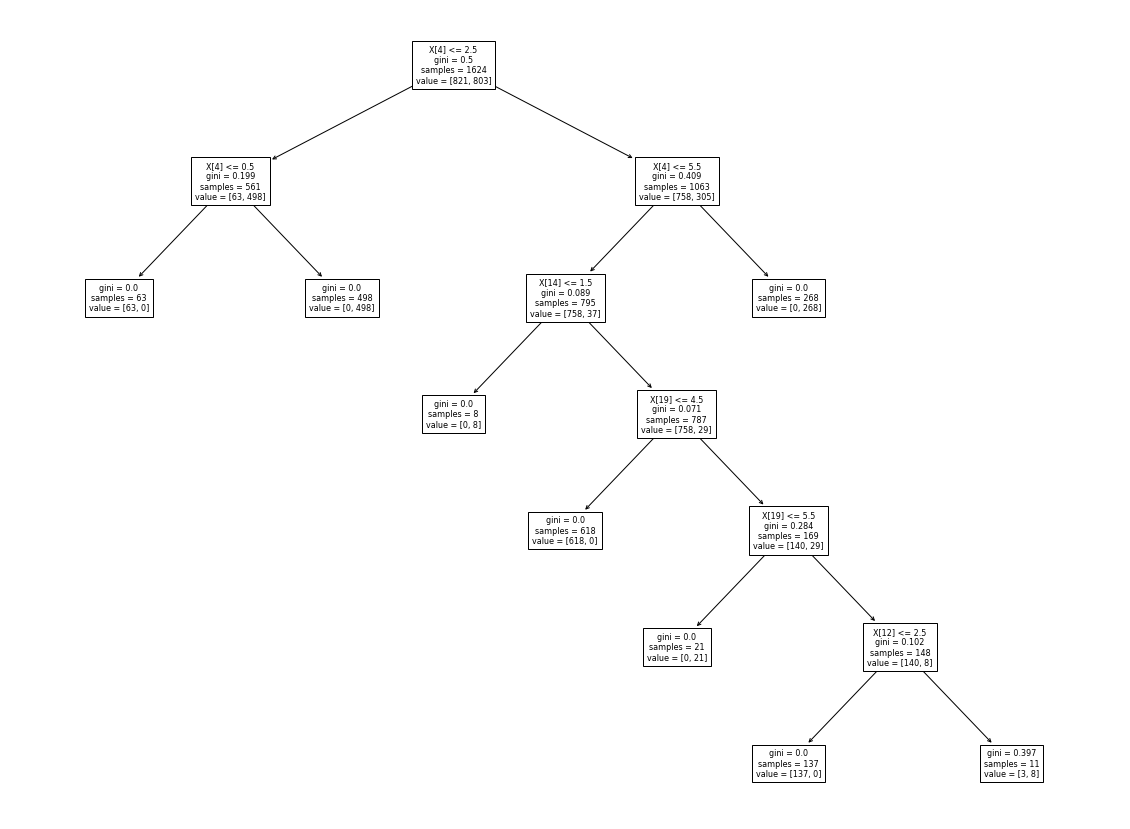

In [46]:
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(dtg.fit(x_trains, y_trains), fontsize=8)
plt.show()

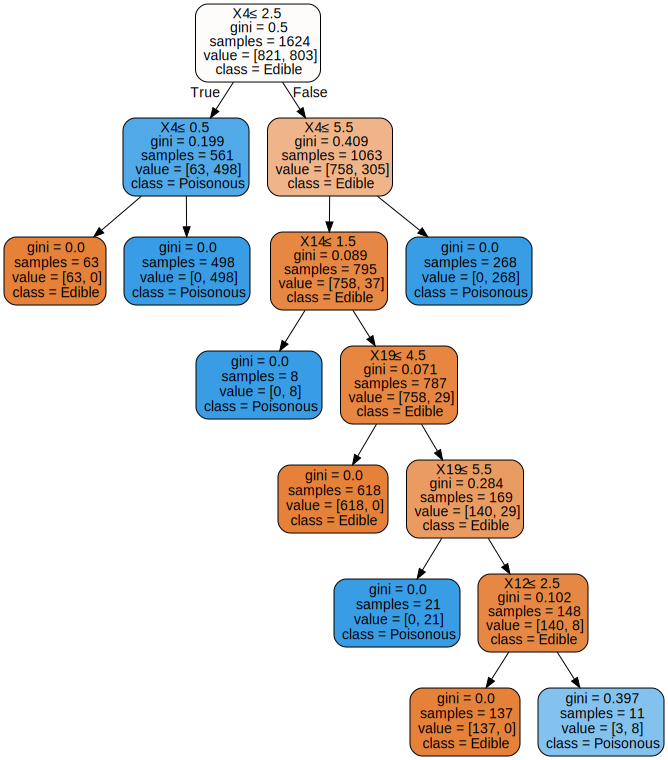

In [48]:
import graphviz

dota_data = tree.export_graphviz(
    dtg.fit(x_trains, y_trains), 
    out_file=None,
    class_names=['Edible', 'Poisonous'],
    filled=True, rounded=True, 
    special_characters=True)
graph = graphviz.Source(dota_data)
graph

In [49]:
#Evaluasi
y_preds = dtg.predict(x_tests)
print(y_preds[0:5])

[0 1 1 1 0]


In [50]:
def inverse_label(e):
    return 'p' if e == 1 else 'e'

ress_label = np.vectorize(inverse_label)
preds_label = ress_label(y_preds[0:5])
print(preds_label)


['e' 'p' 'p' 'p' 'e']


In [51]:
from sklearn.metrics import accuracy_score

# Memprediksi test set labels
y_preds = dtg.predict(x_tests)

#  menghitung set accuracy
accs = accuracy_score(y_test, y_preds)
print("Test set accuracy: {:.2f}".format(accs))

Test set accuracy: 1.00
